In [177]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

%matplotlib inline
plt.style.use('seaborn-white')

In [82]:
#unnamed:0 이라는 열을 index column으로 변경
df = pd.read_csv('USArrests.csv', index_col=0)
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


# PCA

In [4]:
#각 열의 평균 
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [5]:
#각 열의 분산
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [6]:
#assault 변수가 다른 변수들에 비해 평균,분산이 월등하게 큼으로 scale을 통해 변수간의 차이를 줄임

x = pd.DataFrame(scale(df), index=df.index, columns=df.columns)
x.head()

,Murder,Assault,UrbanPop,Rape
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


In [85]:
#주성분 분석 (주성분1=0.535*muder+0.583*assault+0.278*urbanpop+0.543*rape  / rape와 murder사이의 양의 상관관계가 있음)
pca_loadings = pd.DataFrame(PCA().fit(x).components_.T, index=df.columns, columns=['pc1', 'pc2', 'pc3', 'pc4'])
pca_loadings

,pc1,pc2,pc3,pc4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [8]:
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(x), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=x.index)
df_plot

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996
Colorado,1.514563,-0.987555,1.095007,0.001465
Connecticut,-1.358647,-1.088928,-0.643258,-0.118469
Delaware,0.047709,-0.325359,-0.718633,-0.881978
Florida,3.013042,0.039229,-0.576829,-0.096285
Georgia,1.639283,1.278942,-0.342460,1.076797


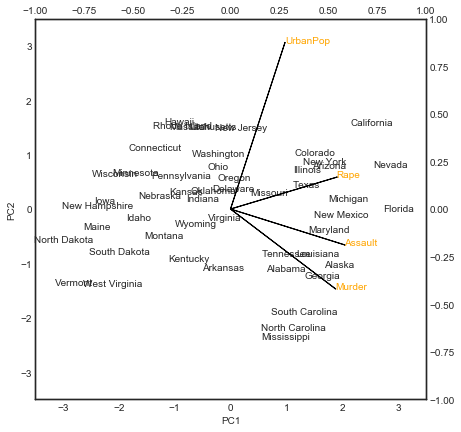

In [108]:
fig , ax1 = plt.subplots(figsize=(7,7))
#ㄴ x축 y 축 범위
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# 주성분1와 주성분2를 그래프에 표현 (ha : horizon,  color=X)
for i in df_plot.index:
    ax1.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
    
# ㄱ x축, y축 생성
ax2 = ax1.twinx().twiny() 

# ㄱ x축, y축 범위
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)


#pc1,pc2 주성분을 그래프에 나타냄
for i in pca_loadings[['pc1', 'pc2']].index:
    ax2.annotate(i, (pca_loadings.pc1.loc[i], -pca_loadings.pc2.loc[i]), color='orange')

# (0,0)으로 부터 선을 그림 
ax2.arrow(0,0,pca_loadings.pc1[0], -pca_loadings.pc2[0])
ax2.arrow(0,0,pca_loadings.pc1[1], -pca_loadings.pc2[1])
ax2.arrow(0,0,pca_loadings.pc1[2], -pca_loadings.pc2[2])
ax2.arrow(0,0,pca_loadings.pc1[3], -pca_loadings.pc2[3])

In [10]:
# 주성분 표준편차
np.sqrt(pca.explained_variance_)

array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

In [11]:
#주성분 분산
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [12]:
#비율=분산/전체 분산 합
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

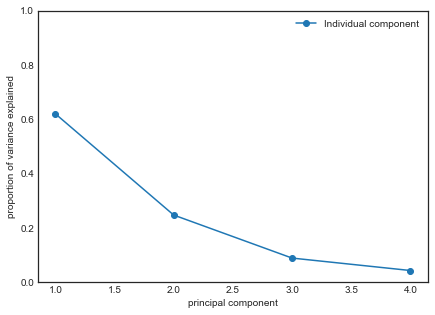

In [120]:
plt.figure(figsize=(7,5))

plt.plot([1,2,3,4],pca.explained_variance_ratio_,'-o', label='Individual component')

plt.ylabel('proportion of variance explained')
plt.xlabel('principal component')
plt.ylim(0,1)
plt.legend()

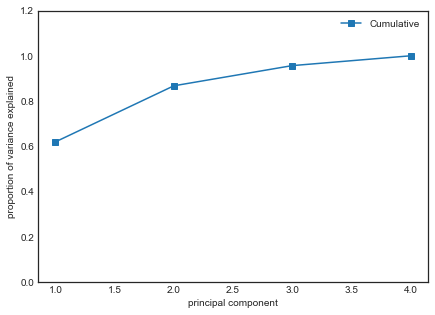

In [123]:
plt.figure(figsize=(7,5))

plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('proportion of variance explained')
plt.xlabel('principal component')
plt.ylim(0,1.2)
plt.legend()

# Clustering

In [129]:
# 데이터 생성
np.random.seed(2)
X = np.random.standard_normal((50,2))
X[:25,0] = X[:25,0]+3
X[:25,1] = X[:25,1]-

X

array([[ 2.58324215, -4.05626683],
       [ 0.8638039 , -2.35972919],
       [ 1.20656441, -4.84174737],
       [ 3.50288142, -5.24528809],
       [ 1.94204778, -4.90900761],
       [ 3.55145404, -1.70779199],
       [ 3.04153939, -5.11792545],
       [ 3.53905832, -4.5961597 ],
       [ 2.9808695 , -2.82499878],
       [ 2.25212905, -3.99097475],
       [ 2.12189211, -4.15643417],
       [ 3.25657045, -4.98877905],
       [ 2.66117803, -4.23618403],
       [ 2.36234499, -5.18761229],
       [ 1.57878277, -4.1534952 ],
       [ 2.73094304, -1.76863321],
       [ 0.56523242, -3.8872735 ],
       [ 3.37044454, -2.64036614],
       [ 3.50185721, -4.8442137 ],
       [ 3.00000976, -3.45764743],
       [ 2.6864918 , -3.22898826],
       [ 1.13190935, -2.26881533],
       [ 4.46767801, -4.33567734],
       [ 3.61134078, -3.95202941],
       [ 2.17086471, -3.91228978],
       [ 1.00036589, -0.38109252],
       [-0.37566942, -0.07447076],
       [ 0.43349633,  1.27837923],
       [-0.63467931,

In [126]:
#k=2
km1 = KMeans(n_clusters=2, n_init=20)
km1.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [127]:
km1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1])

In [133]:
km1.cluster_centers_

array([[-0.23940153,  0.14703307],
       [ 2.53287159, -3.80815122]])

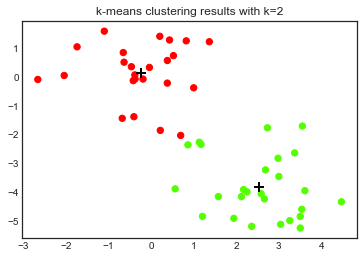

In [128]:
plt.scatter(X[:,0], X[:,1], s=40, c=km1.labels_, cmap=plt.cm.prism) 
plt.title('k-means clustering results with k=2')
plt.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

In [131]:
np.random.seed(4)
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [132]:
pd.Series(km2.labels_).value_counts()

1    21
0    20
2     9
dtype: int64

In [22]:
km2.cluster_centers_

array([[-0.27876523,  0.51224152],
       [ 2.82805911, -4.11351797],
       [ 0.69945422, -2.14934345]])

In [23]:
km2.labels_

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 2])

In [24]:
#inertia(관성):군집의 중심과 속해있는 데이터 사이의 거리의 합, 응집도
km2.inertia_

68.97379200939726

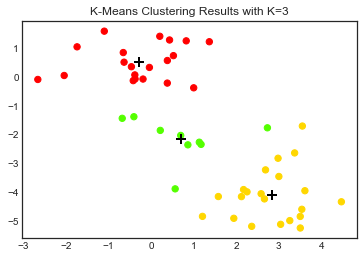

In [27]:
plt.scatter(X[:,0], X[:,1], s=40, c=km2.labels_, cmap=plt.cm.prism) 
plt.title('K-Means Clustering Results with K=3')
plt.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

In [141]:
clusters=linkage(X,method='complete')

pd.DataFrame(clusters,
            columns=['cluster_1','cluster_2','distance','cluster member count'])

,cluster_1,cluster_2,distance,cluster member count
0,26.0,30.0,0.072475,2.0
1,21.0,49.0,0.085590,2.0
2,9.0,24.0,0.113116,2.0
3,0.0,12.0,0.196072,2.0
4,36.0,50.0,0.202379,3.0
5,34.0,45.0,0.221018,2.0
6,28.0,44.0,0.233720,2.0
7,40.0,54.0,0.239863,4.0
8,10.0,52.0,0.249008,3.0
9,7.0,18.0,0.250828,2.0


Text(0.5,1,'complete linkage')

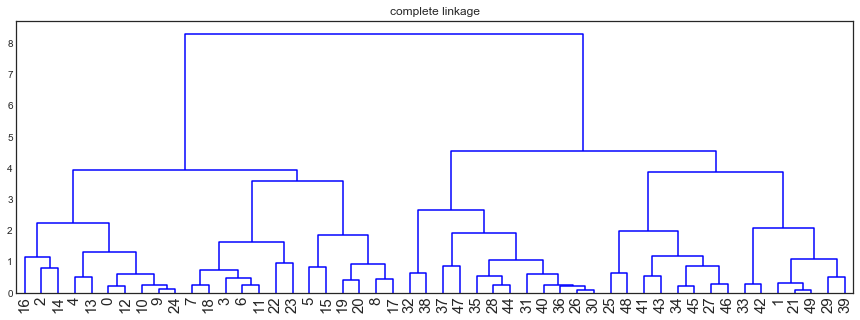

In [40]:
plt.figure(figsize=(15,5))
hierarchy.dendrogram(hierarchy.complete(X),
                          leaf_font_size=15,
                          color_threshold=0)
plt.title('complete linkage')

In [142]:
clusters=linkage(X,method='average')

pd.DataFrame(clusters,
            columns=['cluster_1','cluster_2','distance','cluster member count'])

,cluster_1,cluster_2,distance,cluster member count
0,26.0,30.0,0.072475,2.0
1,21.0,49.0,0.085590,2.0
2,9.0,24.0,0.113116,2.0
3,36.0,50.0,0.171730,3.0
4,0.0,12.0,0.196072,2.0
5,40.0,53.0,0.220815,4.0
6,34.0,45.0,0.221018,2.0
7,10.0,52.0,0.229787,3.0
8,28.0,44.0,0.233720,2.0
9,7.0,18.0,0.250828,2.0


Text(0.5,1,'average linkage')

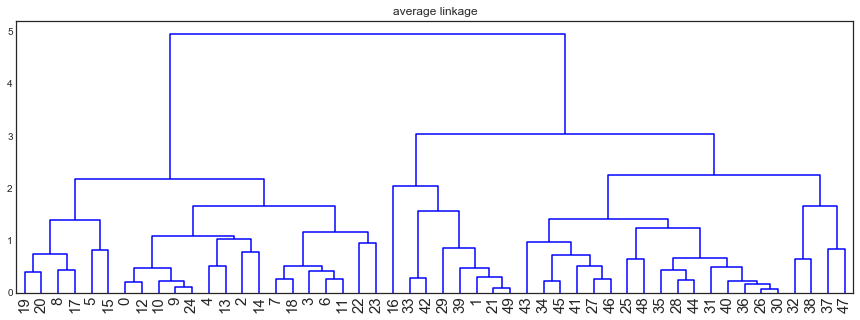

In [41]:
plt.figure(figsize=(15,5))
hierarchy.dendrogram(hierarchy.average(X),
                          leaf_font_size=15,
                          color_threshold=0)
plt.title('average linkage')

In [143]:
clusters=linkage(X,method='single')

pd.DataFrame(clusters,
            columns=['cluster_1','cluster_2','distance','cluster member count'])

,cluster_1,cluster_2,distance,cluster member count
0,26.0,30.0,0.072475,2.0
1,21.0,49.0,0.085590,2.0
2,9.0,24.0,0.113116,2.0
3,36.0,50.0,0.141081,3.0
4,40.0,53.0,0.186220,4.0
5,0.0,12.0,0.196072,2.0
6,10.0,52.0,0.210567,3.0
7,34.0,45.0,0.221018,2.0
8,28.0,44.0,0.233720,2.0
9,7.0,18.0,0.250828,2.0


Text(0.5,1,'single linkage')

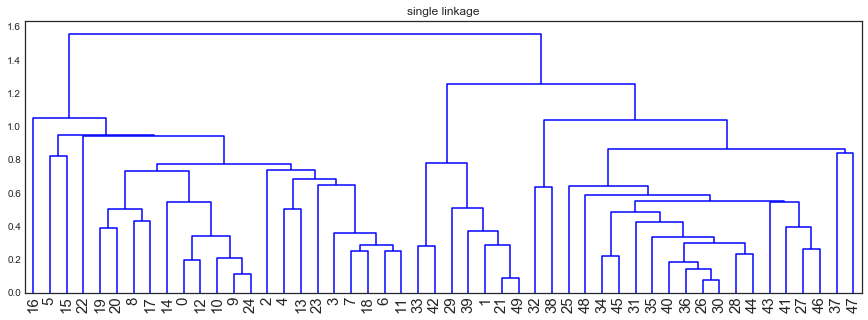

In [42]:
plt.figure(figsize=(15,5))
hierarchy.dendrogram(hierarchy.single(X),
                          leaf_font_size=15,
                          color_threshold=0)
plt.title('single linkage')


# NC160 Data Example

In [44]:
labs= pd.read_csv('NCI_labs.csv',usecols=[1], skiprows=1, names=['type'])
labs

,type
0,CNS
1,CNS
2,CNS
3,RENAL
4,BREAST
5,CNS
6,CNS
7,BREAST
8,NSCLC
9,NSCLC


In [45]:
data = pd.read_csv('NCI_data.csv').drop('Unnamed: 0', axis=1)
data

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
0,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-4.500000e-01,-0.654981,...,-0.990019,0.000000,3.000000e-02,-0.175000,0.629981,-3.000000e-02,0.000000,2.800000e-01,-0.340000,-1.930000
1,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-4.003899e-02,-0.285020,...,-0.270058,-0.300039,-2.500390e-01,-0.535039,0.109941,-8.600390e-01,-1.250049,-7.700390e-01,-0.390039,-2.000039
2,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,4.300000e-01,0.475019,...,0.319981,0.120000,-7.400000e-01,-0.595000,-0.270020,-1.500000e-01,0.000000,-1.200000e-01,-0.410000,0.000000
3,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,2.000000e-02,0.095019,...,-1.240020,-0.110000,-1.600000e-01,0.095000,-0.350020,-3.000000e-01,-1.150010,1.090000e+00,-0.260000,-1.100000
4,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,2.350000e-01,1.490019,...,0.554980,-0.775000,-5.150000e-01,-0.320000,0.634980,6.050000e-01,0.000000,7.450000e-01,0.425000,0.145000
5,0.310000,-0.030000,-0.100000,-0.460000,-0.205000,-5.400000e-01,-0.640000,-0.585000,-7.700000e-01,-0.244980,...,-0.590019,0.000000,-7.400000e-01,-2.095000,-1.390020,-4.000000e-01,0.699990,2.900000e-01,0.550000,0.000000
6,-0.830000,0.000000,0.130000,-1.630000,0.075000,-3.600000e-01,0.100000,0.155000,-2.900000e-01,-0.084981,...,0.189980,-0.220000,-3.000000e-02,-0.495000,0.929980,4.700000e-01,0.129990,-3.000000e-01,0.570000,0.000000
7,-0.190000,-0.870000,-0.450000,0.080000,0.005000,3.500000e-01,-0.040000,-0.265000,-3.100000e-01,-0.244980,...,-0.210020,-0.170000,-4.200000e-01,-0.395000,-0.570020,-9.000000e-02,-0.700010,-5.400000e-01,-0.450000,-2.090000
8,0.460000,0.000000,1.150000,-1.400000,-0.005000,-7.000000e-01,-0.920000,-0.515000,-2.800000e-01,-0.114981,...,0.089980,0.560000,4.100000e-01,0.705000,-0.200019,-3.300000e-01,-0.600010,8.300000e-01,-0.030000,0.650000
9,0.760000,1.490000,0.280000,0.100000,-0.525000,3.600000e-01,0.600000,0.175000,5.800000e-01,1.145019,...,0.299980,-0.590000,-4.100000e-01,-0.375000,-1.150020,-3.300000e-01,-1.220010,-1.700000e-01,-0.110000,-1.790000


In [46]:
labs.type.value_counts()

NSCLC          9
RENAL          9
MELANOMA       8
COLON          7
BREAST         7
OVARIAN        6
LEUKEMIA       6
CNS            5
PROSTATE       2
K562B-repro    1
MCF7D-repro    1
K562A-repro    1
MCF7A-repro    1
UNKNOWN        1
Name: type, dtype: int64

## PCA

In [47]:
pca2 = PCA()
df2_plot = pd.DataFrame(pca2.fit_transform(scale(data)))

In [59]:
df2_plot

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-19.838042,-3.555636,-9.812399,-0.824246,12.609984,7.471505,14.190730,-3.197977,21.938350,-20.369363,...,-3.571612,-11.111674,6.336264,9.077897,-3.892561,-3.240788,0.446627,0.392266,-0.894904,1.236942e-14
1,-23.089215,-6.441460,-13.478251,5.635308,8.035496,3.715178,10.143225,-7.292724,22.338284,-13.119764,...,3.378131,5.232259,-6.325341,-7.665590,3.938798,4.018298,-0.617127,-0.776330,0.969009,1.236942e-14
2,-27.456114,-2.465143,-3.533054,-1.341673,12.564846,17.344925,10.354857,-2.671282,-0.234926,-6.357967,...,1.299500,5.323021,-4.867172,-0.044978,2.027836,-1.089818,-1.695444,0.498405,-0.844418,1.236942e-14
3,-42.816801,9.768358,-0.890073,3.445043,42.269904,27.238815,17.520642,-0.554341,14.264354,15.969204,...,-0.342635,-1.117879,2.511719,6.390061,-3.429572,-0.705737,-1.372244,1.427329,0.735637,1.236942e-14
4,-55.418530,5.198897,-21.094558,15.849712,10.443273,12.991051,12.597895,32.513096,-7.896805,-10.177263,...,-0.264565,-2.311955,2.926478,-1.870319,2.295689,0.614378,2.577214,-0.557610,-0.576024,1.236942e-14
5,-27.178046,-6.780302,-21.813380,13.840873,-7.997553,0.712941,28.003944,31.289055,-10.951667,2.316237,...,0.807691,1.713338,-1.890979,-2.944179,1.973104,-0.137099,-0.186951,1.267768,1.227863,1.236942e-14
6,-31.445938,-3.864070,-30.354536,41.664903,-10.425585,-17.002023,23.697493,-0.947969,14.242779,-7.764623,...,-3.025228,3.398414,-0.145163,-3.072996,-0.755267,0.202526,1.549972,-0.630285,0.574689,1.236942e-14
7,-22.332335,-10.396414,-18.757153,6.951753,5.528218,11.730641,11.768503,22.846198,-3.678267,-5.031131,...,-1.002225,0.748624,-0.573951,2.283327,1.103334,0.363398,-0.446554,-0.315853,-0.432238,1.236942e-14
8,-14.289921,-16.109430,-19.757438,6.565586,3.802939,-8.021668,-13.121521,7.094245,0.913221,-7.963879,...,0.603514,-14.746629,-0.518872,0.832268,2.883307,-1.161293,0.928449,1.150593,-1.578881,1.236942e-14
9,-29.748118,-23.993200,-5.885870,-10.020762,-3.451899,11.694275,0.542643,8.020069,-20.030984,-27.925396,...,2.866892,0.448610,0.950034,0.272611,2.800491,0.092385,-0.091805,0.606916,-0.703641,1.236942e-14


In [70]:
#주성분5개

pd.DataFrame([df2_plot.iloc[:,:5].std(axis=0, ddof=0).as_matrix(),
              pca2.explained_variance_ratio_[:5],
              np.cumsum(pca2.explained_variance_ratio_[:5])],
             index=['Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion'],
             columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

C:\Users\Hanyuri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


,PC1,PC2,PC3,PC4,PC5
Standard Deviation,27.853469,21.481355,19.820465,17.032556,15.971807
Proportion of Variance,0.113589,0.067562,0.057518,0.042476,0.037350
Cumulative Proportion,0.113589,0.181151,0.238670,0.281145,0.318495


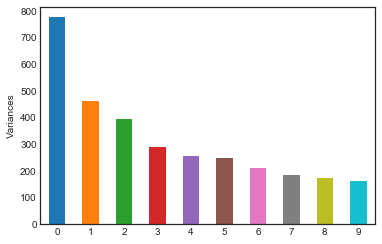

In [71]:
#주성분10개 
df2_plot.iloc[:,:10].var(axis=0, ddof=0).plot(kind='bar', rot=0)
plt.ylabel('Variances');

Text(0.5,0,'Z1')

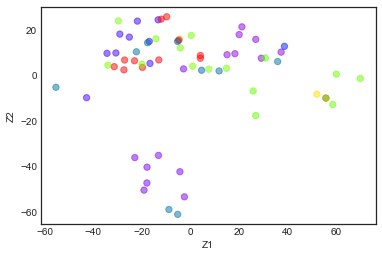

In [152]:
#주성분1과 주성분2 그래프
plt.scatter(df2_plot.iloc[:,0], -df2_plot.iloc[:,1], c=pd.factorize(labs.type)[0], cmap=plt.cm.prism, alpha=0.5, s=40) 
plt.ylabel('Z2')
plt.xlabel('Z1')

Text(0.5,0,'Z1')

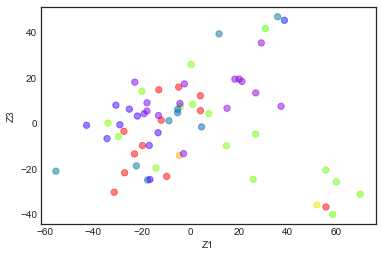

In [150]:
#주성분1 와 주성분3

plt.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,2], c=pd.factorize(labs.type)[0], cmap=plt.cm.prism, alpha=0.5, s=40) 
plt.ylabel('Z3')
plt.xlabel('Z1')

#handles = []
#labels = pd.factorize(labs.type.unique())
#norm = mpl.colors.Normalize(vmin=0.0, vmax=14.0)

#for i, v in zip(labels[0], labels[1]):
#    handles.append(mpl.patches.Patch(color=plt.cm.prism(norm(i)), label=v, alpha=0.5))

#plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Text(0.5,0,'principal component')

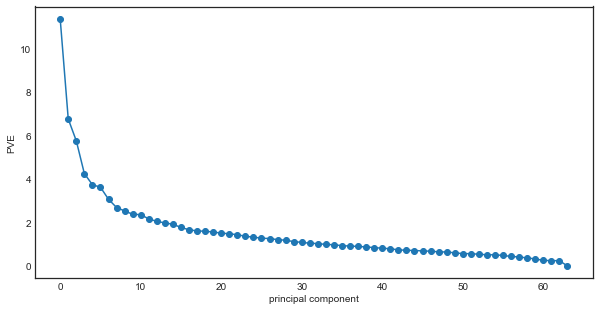

In [159]:
plt.figure(figsize=(10,5))
plt.plot(pca2.explained_variance_ratio_*100, '-o')
plt.ylabel('PVE')
plt.xlabel('principal component')

Text(0.5,0,'principal component')

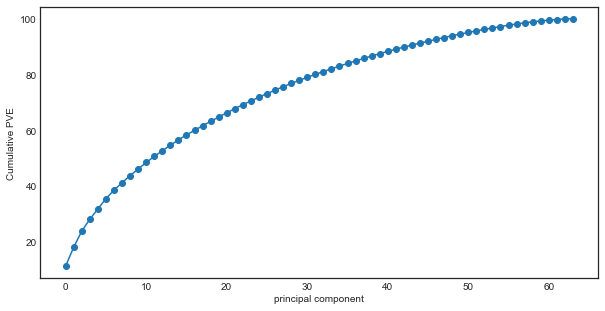

In [161]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca2.explained_variance_ratio_)*100, '-o')
plt.ylabel('Cumulative PVE')
plt.xlabel('principal component')


## clustering

In [74]:
X= pd.DataFrame(scale(data), index=labs.type, columns=data.columns)
X.head()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
type,,,,,,,,,,,,,,,,,,,,,
CNS,0.728671,1.607220,1.325688,1.355688,-0.604845,-0.220654,0.898137,-0.868741,-1.058612,-1.059174,...,-1.030663,-0.358518,-0.238245,-0.392487,0.831370,-0.200286,-0.075668,0.520893,-0.836365,-1.384675
CNS,1.596418,1.753544,0.441686,0.654119,0.911898,1.648748,1.849697,2.226625,-0.095860,-0.477977,...,-0.215657,-0.625720,-0.489938,-0.800791,0.013818,-1.105413,-1.117676,-0.823652,-0.925425,-1.431446
CNS,2.190290,-0.016217,-0.349092,0.266465,-1.311310,-0.019322,0.191185,1.988627,1.007979,0.716019,...,0.452274,-0.251651,-0.930304,-0.868790,-0.583517,-0.331142,-0.075668,0.008704,-0.960951,-0.095838
RENAL,0.682995,-0.375502,1.628079,-0.444299,1.244434,-0.019322,0.408709,0.798057,0.045135,0.119051,...,-1.313667,-0.456479,-0.409013,-0.086293,-0.709285,-0.494711,-1.034286,1.558075,-0.693981,-0.830408
BREAST,1.151170,-0.581759,0.965145,1.138767,0.361351,-0.033703,0.177590,0.396239,0.550041,2.310550,...,0.718297,-1.048700,-0.728079,-0.556925,0.839231,0.492157,-0.075668,1.116312,0.525182,0.000992


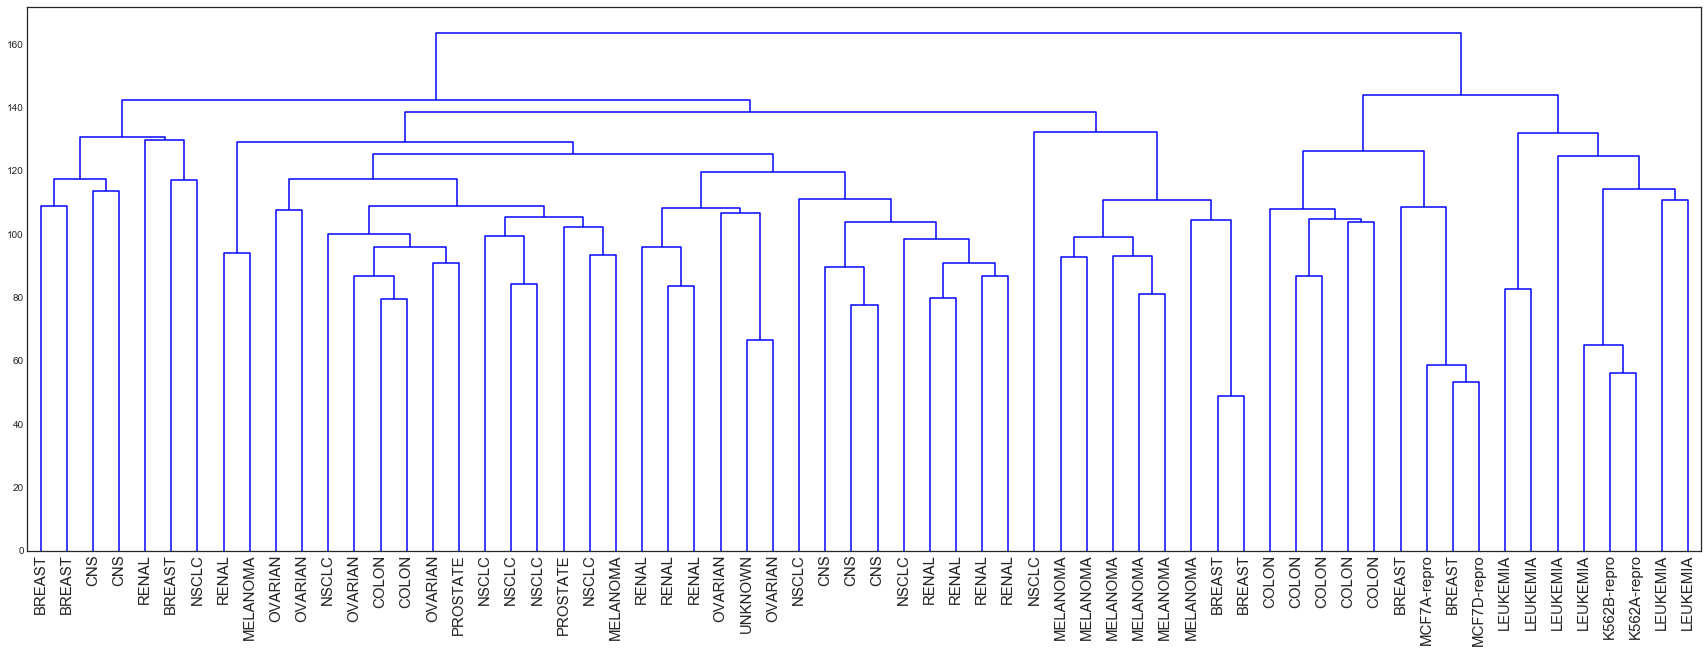

In [75]:
plt.figure(figsize=(30,10))
p1 = hierarchy.dendrogram(hierarchy.complete(X),
                          labels=X.index, 
                          color_threshold=0, 
                          leaf_font_size=15)

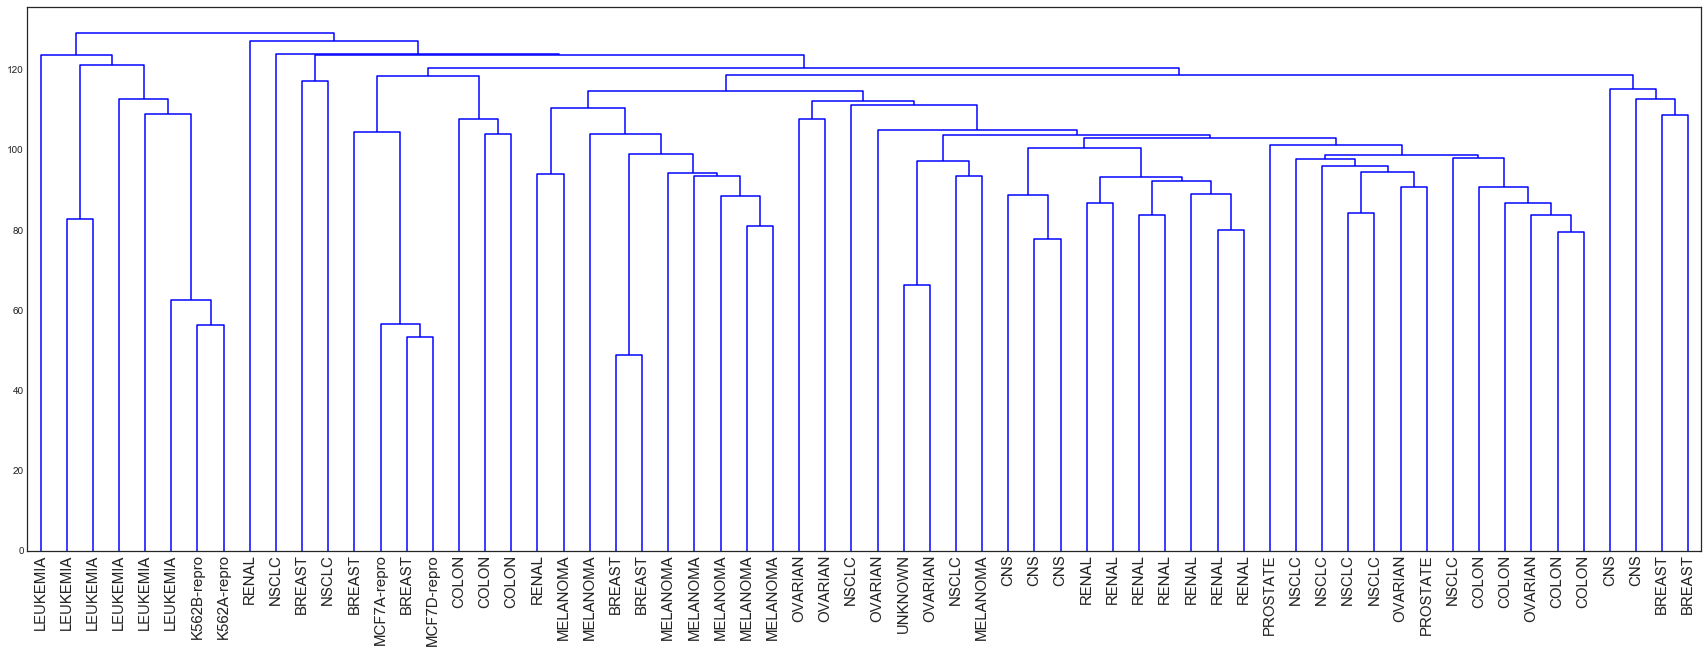

In [76]:
plt.figure(figsize=(30,10))
p1 = hierarchy.dendrogram(hierarchy.average(X),
                          labels=X.index, 
                          color_threshold=0, 
                          leaf_font_size=15)

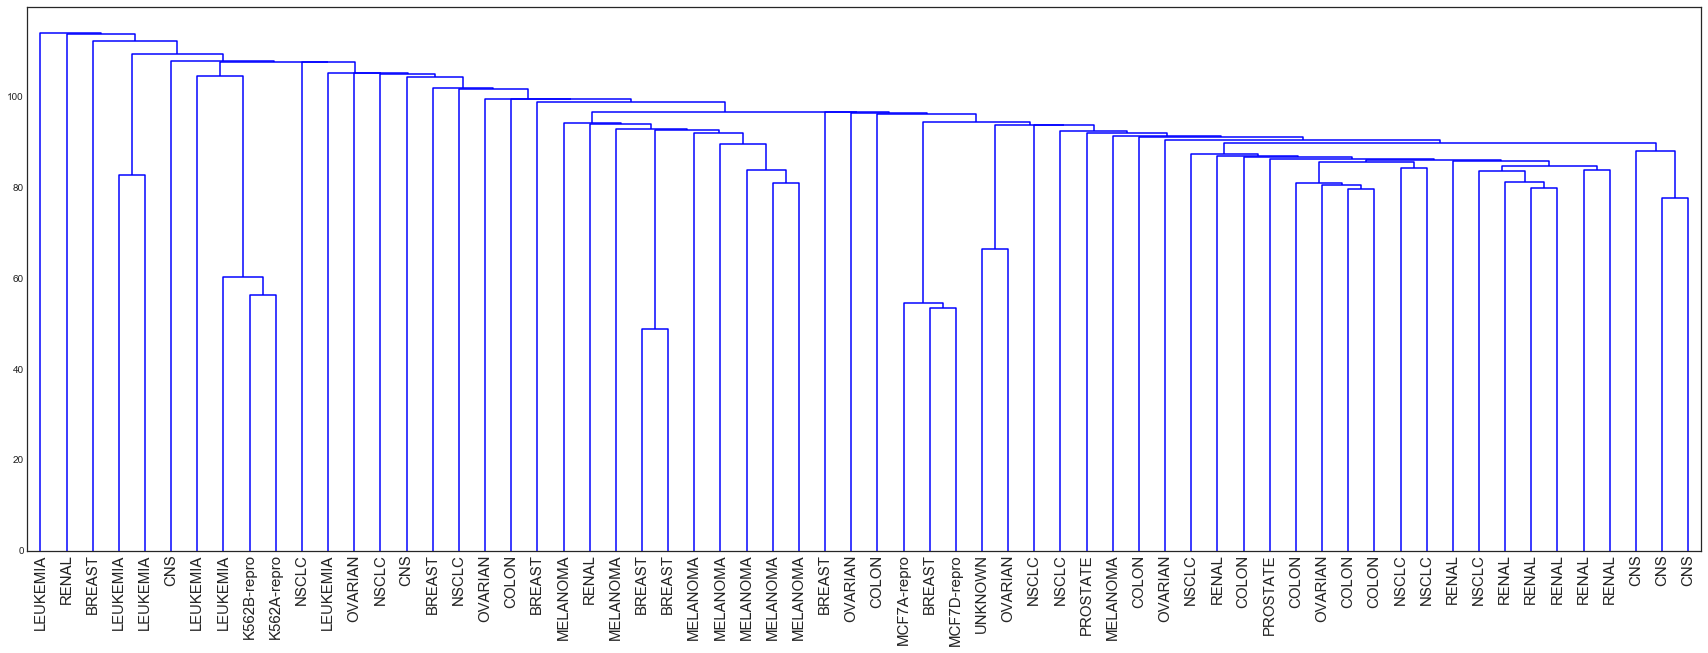

In [77]:
plt.figure(figsize=(30,10))
p1 = hierarchy.dendrogram(hierarchy.single(X),
                          labels=X.index,
                          color_threshold=0, 
                          leaf_font_size=15)

## k-means

In [78]:
np.random.seed(2)
km4 = KMeans(n_clusters=4, n_init=50)
km4.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=50, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [79]:
km4.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [182]:
kmc=pd.Series(km4.labels_).value_counts().sort_index()
kmc

0     8
1    23
2    24
3     9
dtype: int64

In [178]:
#클러스터링
ac=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')
labels=ac.fit_predict(X)
labels

array([0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [184]:
acc=pd.Series(labels).value_counts().sort_index()
acc

0    40
1     8
2     9
3     7
dtype: int64

In [174]:
#주성분5개 사용한 kmeans
np.random.seed(2)
km5 = KMeans(n_clusters=4, n_init=50)
km5.fit(X.iloc[:,:5])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=50, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [175]:
pd.Series(km5.labels_).value_counts().sort_index()

0    11
1    20
2    20
3    13
dtype: int64